In [6]:
# Exploratory Data Analysis (EDA) for Electronics Supply Chain Data

## 1. Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualizations
sns.set(style="whitegrid")


In [7]:
df = pd.read_csv('../data/electronics_supply_chain_data_500.csv')

# Display basic information
df.info()

# Show the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  257 non-null    object 
 1   product_id            257 non-null    int64  
 2   product_name          257 non-null    object 
 3   product_category      257 non-null    object 
 4   order_date            257 non-null    object 
 5   availability_date     257 non-null    object 
 6   supplier_id           257 non-null    int64  
 7   supplier_name         257 non-null    object 
 8   supplier_location     257 non-null    object 
 9   supplier_reliability  257 non-null    float64
 10  quantity_ordered      257 non-null    int64  
 11  quantity_available    257 non-null    int64  
 12  demand_forecast       257 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 26.2+ KB


,date,product_id,product_name,product_category,order_date,availability_date,supplier_id,supplier_name,supplier_location,supplier_reliability,quantity_ordered,quantity_available,demand_forecast
0,2023-10-09,107,Microsoft Surface Pro 9,electronics,2023-06-05,2023-11-03,5,TechSource Inc.,Japan,0.90,430,315,891
1,2023-08-17,21,Logitech G502 Hero,electronics,2023-02-07,2023-05-13,10,GadgetPro,UK,0.77,63,1137,711
2,2023-04-15,122,Microsoft Surface Book 3,electronics,2024-05-29,2024-06-03,10,FutureTech,Japan,0.90,280,1007,908
3,2023-03-31,117,Epson EcoTank ET-2760,electronics,2023-04-13,2023-05-23,2,PremiumElectronics,UK,0.94,1816,1214,1951
4,2024-03-08,104,NVIDIA GeForce RTX 3080,electronics,2023-04-13,2024-07-09,9,GadgetPro,Brazil,0.90,1218,813,287


In [8]:
# Convert date columns to numeric format (days since a reference date)
df['order_date'] = pd.to_datetime(df['order_date'])
df['availability_date'] = pd.to_datetime(df['availability_date'])
df['days_to_availability'] = (df['availability_date'] - df['order_date']).dt.days

# Drop original date columns
df = df.drop(['order_date', 'availability_date'], axis=1)


In [10]:
# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


date                    0
product_id              0
product_name            0
product_category        0
supplier_id             0
supplier_name           0
supplier_location       0
supplier_reliability    0
quantity_ordered        0
quantity_available      0
demand_forecast         0
days_to_availability    0
dtype: int64

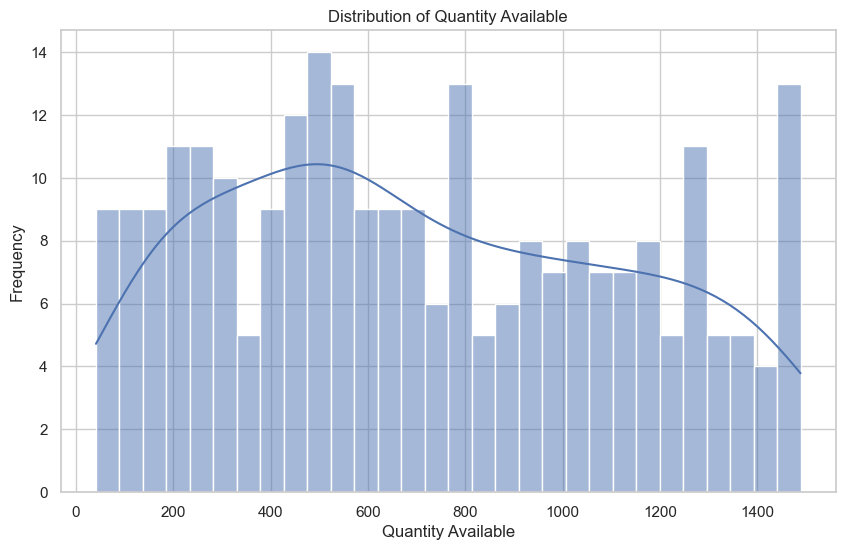

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['quantity_available'], bins=30, kde=True)
plt.title('Distribution of Quantity Available')
plt.xlabel('Quantity Available')
plt.ylabel('Frequency')
plt.show()


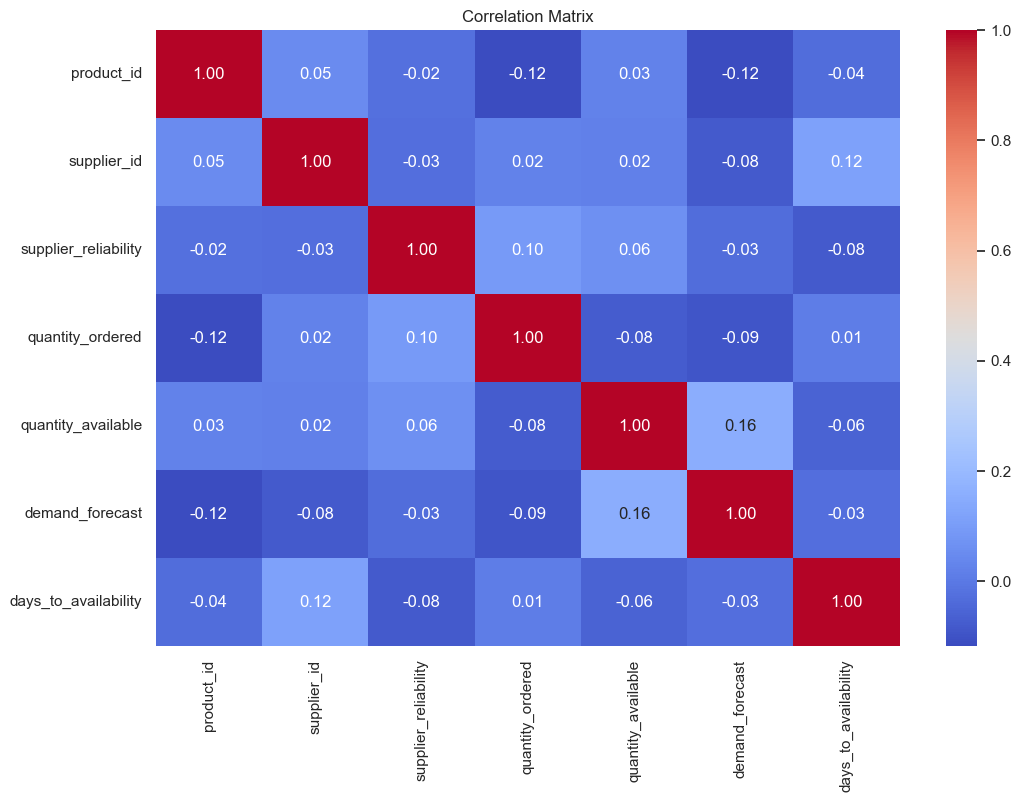

In [12]:
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


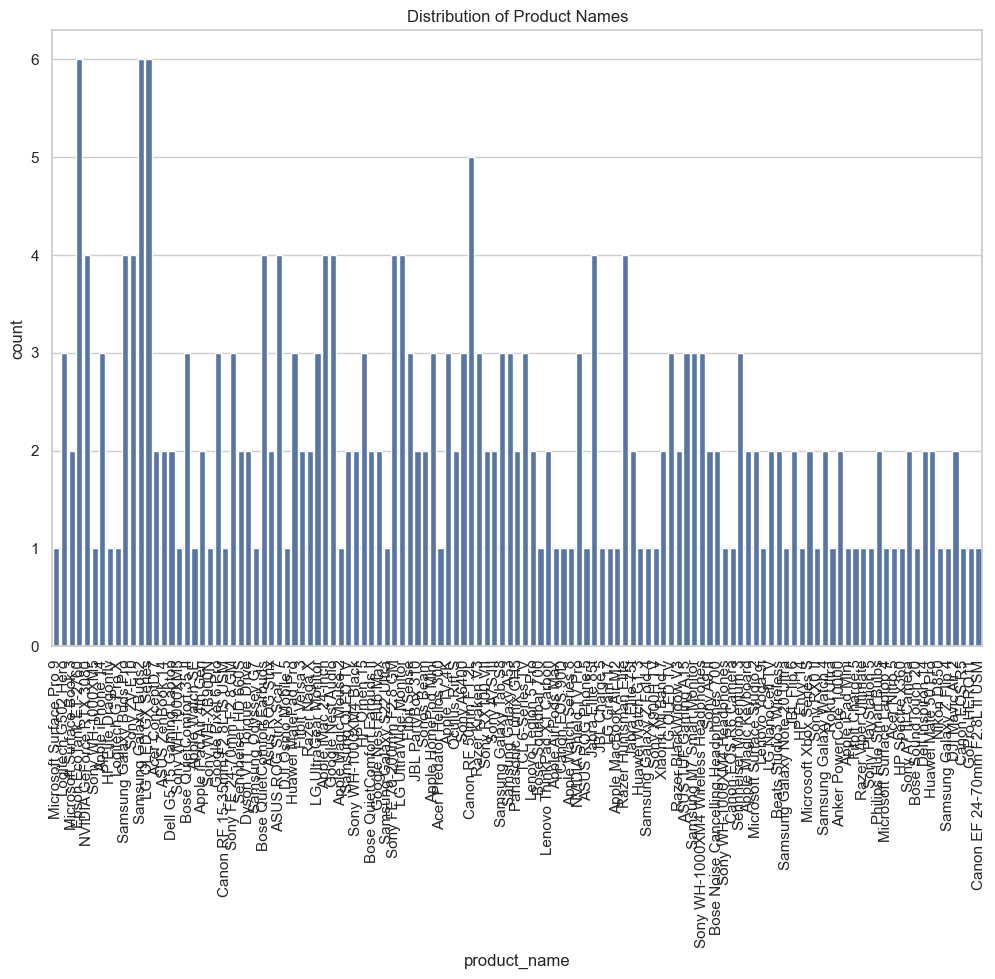

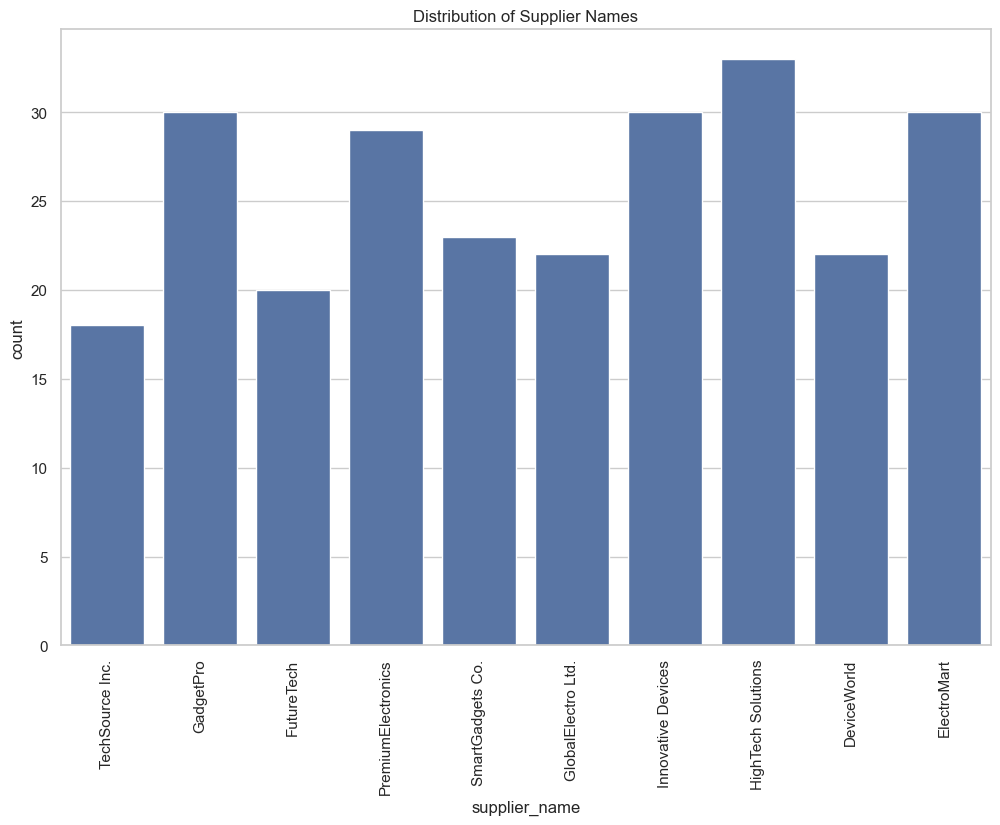

In [13]:
# Distribution of categorical features
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='product_name')
plt.title('Distribution of Product Names')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='supplier_name')
plt.title('Distribution of Supplier Names')
plt.xticks(rotation=90)
plt.show()
